# Assignment 2 (QLSC612)
BHS,2020/05/30
Erjun ZHANG

## Goals:
1. Generate a new variable (named partY) of random noise and add it to the existing brainsize.csv dataset. The new variable can be either continuous or categorical—you are welcome to choose whatever distribution you prefer.
2. Generate either associations with (e.g., correlations) or predictions of the new, fake partY variable using the existing variables in brainsize.csv. Notably, these associations or predictions must yield a significant p-value (at the p < 0.05 threshold), but ideally the p-value should be as low as possible!
3. Generate a second, new variable (named partY2) using the same distribution as partY (but with a different random seed!) and re-run the same associations or prediction models from step (2) using this new variable as the outcome measure.

## Data preparation

### Packages loading

In [509]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

import math

### Data loading

In [510]:
# Orginal data!
# Remove order column 0 and separater ';'
data=pd.read_csv('brainsize.csv',sep=';',index_col=0) #do not show column 0

In [511]:
# Check our dataset quality
data.head(len(data))

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545
6,Female,99,90,110,146,69.0,928799
7,Female,138,136,131,138,64.5,991305
8,Female,92,90,98,175,66.0,854258
9,Male,89,93,84,134,66.3,904858
10,Male,133,114,147,172,68.8,955466


In [512]:
# check data size
np.shape(data)

(40, 7)

### Missing value (data cleaning)

As we can see, there are two places data missing in table above. Since we have onely a small part of data missing (40 complete samples and 2 missing sample), we only use these 38 data lines as our basic dataset.

In [513]:
# Remove lines with NA value(s) 
data = pd.read_csv('brainsize.csv',sep=';',index_col=0,na_values=".")
data2=data.dropna()

In [514]:
# Check data after data cleaning
data2.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545
6,Female,99,90,110,146.0,69.0,928799


In [515]:
# Check data shape to see if the data cleaning finish.
np.shape(data2)

(38, 7)

### Generating New Variables



/home/erjun/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NormaltestResult(statistic=3.4572305033614747, pvalue=0.1775300743110011)

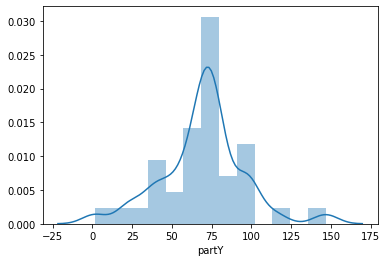

In [516]:
#Choose seed value to make sure we have a variable with a certain arrays.
np.random.seed(2242345)
data2['partY'] = np.random.normal(np.mean(data2['Height']),25,size=len(data2))
plt.figure()
sns.distplot(data2['partY'])
stats.normaltest(data2['partY'])

In [517]:
# check 'partY'
#plt.scatter(np.arange(38),np.sort(data2['partY']))

In [518]:
# Create a new variable 'partY2' with same distribution as 'partY1' but having different seeds.
np.random.seed(39124305)
data2['partY2'] = np.random.normal(np.mean(data2['Height']),25,size=len(data2))
data2.head(len(data2))

/home/erjun/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
1,Female,133,132,124,118.0,64.5,816932,37.783458,115.205261
3,Male,139,123,150,143.0,73.3,1038437,24.284576,106.226106
4,Male,133,129,128,172.0,68.8,965353,73.737828,104.269595
5,Female,137,132,134,147.0,65.0,951545,60.819062,55.067508
6,Female,99,90,110,146.0,69.0,928799,51.786429,93.331143
7,Female,138,136,131,138.0,64.5,991305,75.931357,59.117767
8,Female,92,90,98,175.0,66.0,854258,115.020613,80.029794
9,Male,89,93,84,134.0,66.3,904858,69.265530,51.142593
10,Male,133,114,147,172.0,68.8,955466,73.060468,81.556950
11,Female,132,129,124,118.0,64.5,833868,76.082659,103.307626


NormaltestResult(statistic=6.239883038046738, pvalue=0.044159750849538076)

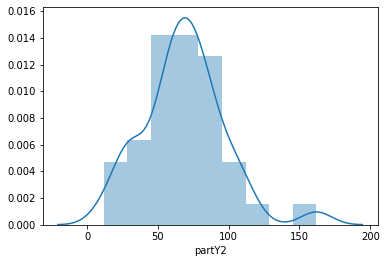

In [519]:
plt.figure()
sns.distplot(data2['partY2'])
stats.normaltest(data2['partY2'])

## Data analysis

### Train a model

In [524]:
fig = px.scatter_matrix(data2)
fig.show()

### Let us find the relationship between 'Height' and 'partY'

In [525]:
# Firt we tried least square model on (partY ~ (Height)) and other other nonlinear
# models. We found p values are greater than level of 0.05, except (partY ~ np.log(Height))
model = smf.ols('(partY) ~ np.log(Height)', data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7.612
Date:                Sun, 31 May 2020   Prob (F-statistic):            0.00906
Time:                        23:08:11   Log-Likelihood:                -174.33
No. Observations:                  38   AIC:                             352.7
Df Residuals:                      36   BIC:                             355.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        880.8190    294.115      2.

In [526]:
# According model above, we can get our predicated valuse for each 'Height' in data2.
partY_processed = np.asarray(-192.0811*np.log(data2['Height'])+880.8190)

### Predictation

In [532]:
# Firstly, we use the same method to see if we can find the same model.
model = smf.ols('(partY2) ~ np.log(Height)', data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2885
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.595
Time:                        23:17:51   Log-Likelihood:                -181.30
No. Observations:                  38   AIC:                             366.6
Df Residuals:                      36   BIC:                             369.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        258.2738    353.352      0.

We got a different model with the high p value  and quite samll R-squared value. Thus, we can say our first model is not so reliable as we thought before, even it has p-value < 0.05.

In [543]:
stats.ttest_ind(data2['partY2'], partY_processed)

Ttest_indResult(statistic=-0.18873977153731933, pvalue=0.85081344805178)

In [542]:
# We use Pearson's test to check if data2['partY2'] and partY_processed related.
r2, p2 = stats.stats.pearsonr(data2['partY2'],partY_processed)
print("Pearson's r [PartY2] = ",r2)
print("p-value [PartY2] = ",p2)

Pearson's r [PartY2] =  0.08915964250065242
p-value [PartY2] =  0.5945050239448917


As the p-value is much greater than 0.05 and Pearson's r is quit samll. Thus we can say there are no strong evidence in favor of that our model can be applied to this new sample (partY2), even they share the same distribution.

We do find some relationship between given dataset variables and our randomly generate variable 'partY'. This mode has p value smaller than 0.05, but still it failed on another new genrated varable 'partY2' with same distribution as 'partY'.